Missing Values per Column:
 1        0
2        0
3        1
4        0
5        0
6        0
7        0
8        8
Label    0
dtype: int64

Class Distribution:
 Label
 1    500
-1    268
Name: count, dtype: int64


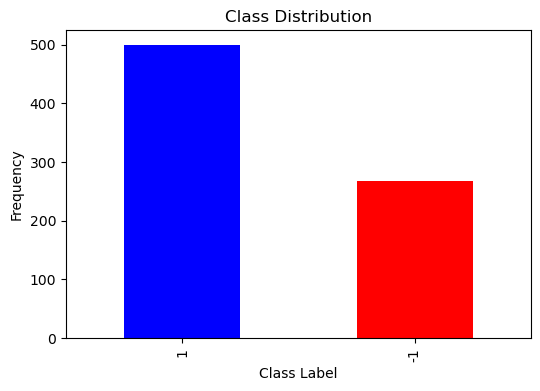

Basic Perceptron Accuracy: 0.5649

Activation Function: step
Accuracy: 0.7078
Classification Report:
               precision    recall  f1-score   support

          -1       0.60      0.48      0.54        54
           1       0.75      0.83      0.79       100

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154


Activation Function: sigmoid
Accuracy: 0.7532
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.70      0.67        54
           1       0.83      0.78      0.80       100

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154


Activation Function: tanh
Accuracy: 0.7597
Classification Report:
               precision    recall  f1-score   support

          -1       0.64      0.70      0.67       

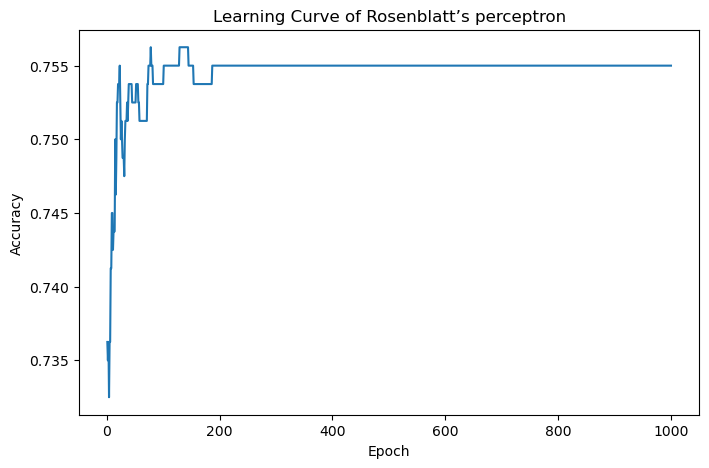

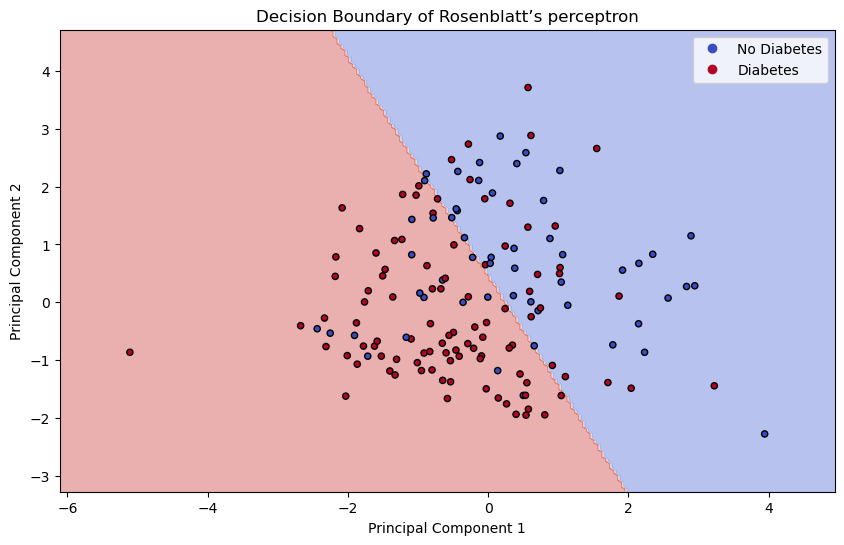


Best Parameters for scikit-learn Perceptron: {'alpha': 0.001, 'early_stopping': False, 'eta0': 0.01, 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.0001}
scikit-learn Perceptron Accuracy after Tuning: 0.7792

Best Parameters for SVM: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy after Tuning: 0.7662
Logistic Regression Accuracy: 0.7597
Dummy Classifier Accuracy: 0.3506

Comparison of Models:
                             Model  Accuracy
0                 Dummy Classifier  0.350649
1              Logistic Regression  0.759740
2          Rosenblatt’s perceptron  0.564935
3  Rosenblatt’s perceptron (tuned)  0.759740
4  scikit-learn Perceptron (tuned)  0.779221
5                      SVM (tuned)  0.766234


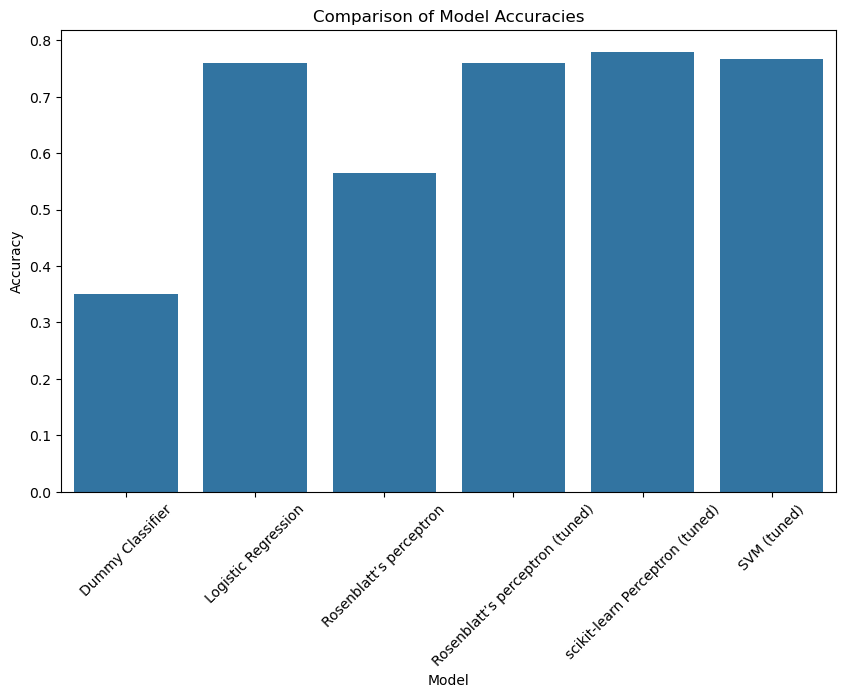


Basic Perceptron Classification Report:
              precision    recall  f1-score   support

          -1       0.43      0.70      0.53        54
           1       0.75      0.49      0.59       100

    accuracy                           0.56       154
   macro avg       0.59      0.60      0.56       154
weighted avg       0.64      0.56      0.57       154



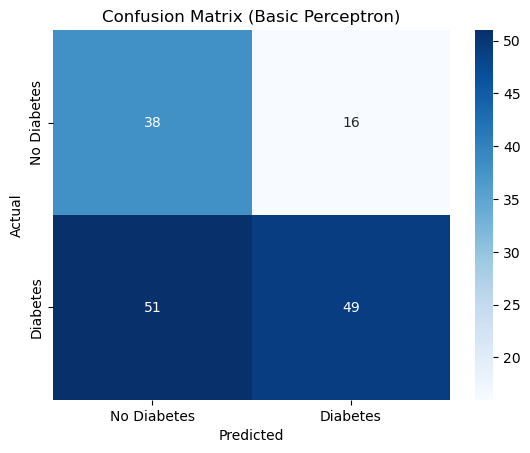


Rosenblatt’s perceptron Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.70      0.67        54
           1       0.83      0.79      0.81       100

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



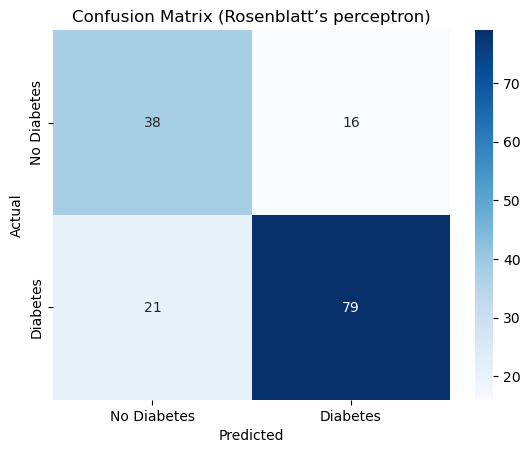


scikit-learn Perceptron Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.74      0.70        54
           1       0.85      0.80      0.82       100

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.78      0.78       154



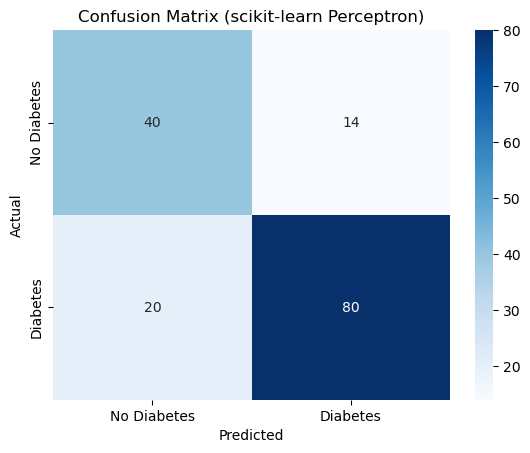


Logistic Regression Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.70      0.67        54
           1       0.83      0.79      0.81       100

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



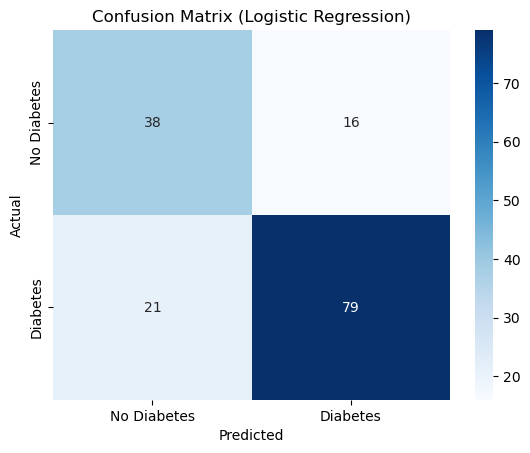


SVM Classification Report:
              precision    recall  f1-score   support

          -1       0.65      0.74      0.69        54
           1       0.85      0.78      0.81       100

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154



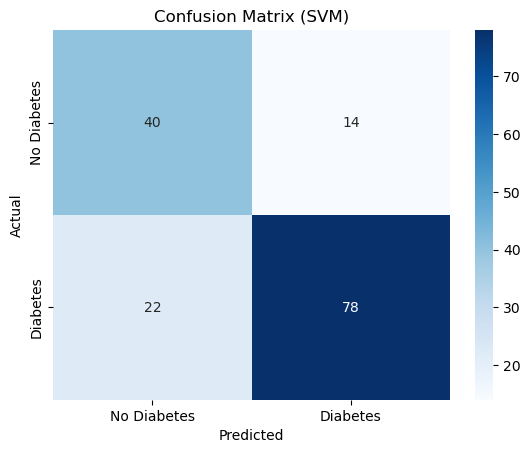

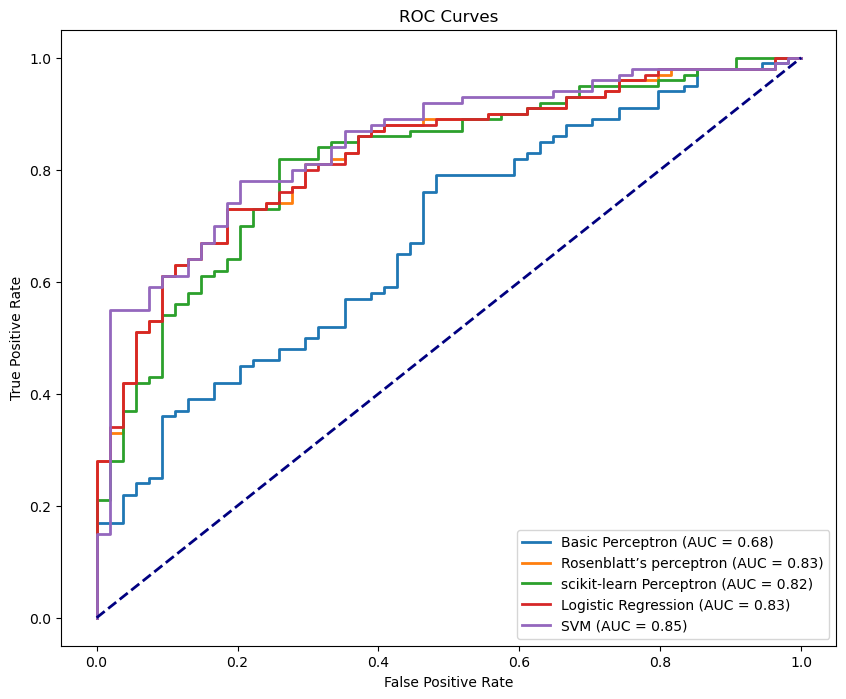

In [2]:
# Imports 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_curve, auc)
from sklearn.linear_model import LogisticRegression, Perceptron as SKPerceptron
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, ClassifierMixin

# For handling class imbalance hence using the below library to overcoming this while training the data 
from imblearn.over_sampling import SMOTE

#  Data Preprocessing and Analysis

# Loading  the data
file_path = '/Users/suryaembar/Downloads/diabetes_scale.txt'  

# Parse the dataset into a DataFrame
data = []
with open(file_path, 'r') as file:
    for line in file.readlines():
        elements = line.strip().split()
        label = int(elements[0])  # +1 or -1
        features = {int(e.split(":")[0]): float(e.split(":")[1]) for e in elements[1:]}
        data.append((label, features))

# Converting  to DataFrame
df = pd.DataFrame([d[1] for d in data])  
df['Label'] = [d[0] for d in data]  

# Checking  for missing values
missing_values = df.isna().sum()
print("Missing Values per Column:\n", missing_values)

# Imputing the  missing values with the mean of each feature
df.fillna(df.mean(), inplace=True)

# Checking the  class distribution for imbalance
label_counts = df['Label'].value_counts()
print("\nClass Distribution:\n", label_counts)

# Plotting the  class distribution
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.show()

# Separate features and labels
X = df.drop(columns=['Label']).values
y = df['Label'].values

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

#  Train/Test Split and Handling Class Imbalance

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#  Implement of the  Rosenblatt Perceptron 

class BasicPerceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert labels to +1, -1
        y_ = np.where(y <= 0, -1, 1)

        # Training
        for _ in range(self.n_iter):
            # Shuffle the data
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y_[indices]

            for idx, x_i in enumerate(X_shuffled):
                condition = y_shuffled[idx] * (np.dot(x_i, self.weights) + self.bias)
                if condition <= 0:
                    self.weights += self.learning_rate * y_shuffled[idx] * x_i
                    self.bias += self.learning_rate * y_shuffled[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, -1)
    
    def decision_function(self, X):
        # Return the linear output (raw scores)
        return np.dot(X, self.weights) + self.bias

# Train the Basic Perceptron
basic_perceptron = BasicPerceptron(learning_rate=0.01, n_iter=1000)
basic_perceptron.fit(X_train_resampled, y_train_resampled)
y_pred_basic = basic_perceptron.predict(X_test)
accuracy_basic = accuracy_score(y_test, y_pred_basic)
print(f"Basic Perceptron Accuracy: {accuracy_basic:.4f}")

#  Rosenblatt’s perceptron with Different Activation Functions

class PerceptronWithActivation:
    def __init__(self, learning_rate=0.01, n_iter=1000, activation='step'):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.activation = activation
        self.weights = None
        self.bias = 0

    def activation_function(self, x):
        if self.activation == 'step':
            return np.where(x >= 0, 1, -1)
        elif self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation == 'tanh':
            return np.tanh(x)
        else:
            raise ValueError("Unsupported activation function")

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Adjust labels according to activation function
        if self.activation == 'sigmoid':
            y_ = np.where(y <= 0, 0, 1)  # labels 0 and 1 for sigmoid
        elif self.activation in ['tanh', 'step']:
            y_ = np.where(y <= 0, -1, 1)
        else:
            raise ValueError("Unsupported activation function")

        # Training
        for _ in range(self.n_iter):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y_[indices]

            for idx, x_i in enumerate(X_shuffled):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                if self.activation == 'step':
                    condition = y_shuffled[idx] * linear_output
                    if condition <= 0:
                        self.weights += self.learning_rate * y_shuffled[idx] * x_i
                        self.bias += self.learning_rate * y_shuffled[idx]
                else:
                    error = y_shuffled[idx] - y_predicted
                    gradient = error * x_i
                    self.weights += self.learning_rate * gradient
                    self.bias += self.learning_rate * error

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        if self.activation == 'step':
            return np.where(linear_output >= 0, 1, -1)
        elif self.activation == 'sigmoid':
            y_pred = self.activation_function(linear_output)
            return np.where(y_pred >= 0.5, 1, 0)
        elif self.activation == 'tanh':
            y_pred = self.activation_function(linear_output)
            return np.where(y_pred >= 0, 1, -1)
        
    def decision_function(self, X):
        # Return the linear output (raw scores)
        return np.dot(X, self.weights) + self.bias

# Comparison of Activation Functions

activations = ['step', 'sigmoid', 'tanh']
results = []

for activation in activations:
    perceptron_act = PerceptronWithActivation(
        learning_rate=0.01, n_iter=1000, activation=activation)
    perceptron_act.fit(X_train_resampled, y_train_resampled)
    y_pred = perceptron_act.predict(X_test)
    
    if activation == 'sigmoid':
        y_test_mapped = np.where(y_test <= 0, 0, 1)
        y_pred_mapped = y_pred
    else:
        y_test_mapped = y_test
        y_pred_mapped = y_pred

    accuracy = accuracy_score(y_test_mapped, y_pred_mapped)
    fpr, tpr, thresholds = roc_curve(y_test_mapped, perceptron_act.decision_function(X_test))
    roc_auc = auc(fpr, tpr)
    
    print(f"\nActivation Function: {activation}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test_mapped, y_pred_mapped))
    
    results.append({
        'activation': activation,
        'accuracy': accuracy,
        'roc_auc': roc_auc
    })

# Displaying the  results
results_df = pd.DataFrame(results)
print("\nComparison of Activation Functions:")
print(results_df)

#  Hyperparameter Tuning with Grid Search for Rosenblatt’s perceptron

class PerceptronClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.01, n_iter=1000, activation='step'):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.activation = activation

    def fit(self, X, y):
        self.perceptron = PerceptronWithActivation(
            learning_rate=self.learning_rate, n_iter=self.n_iter, activation=self.activation)
        self.perceptron.fit(X, y)
        return self

    def predict(self, X):
        return self.perceptron.predict(X)

    def decision_function(self, X):
        return self.perceptron.decision_function(X)

# Defining the  parameter grid for Rosenblatt’s perceptron
param_grid_custom = {
    'learning_rate': [0.0001, 0.001, 0.01],
    'n_iter': [500, 1000, 1500],
    'activation': ['step', 'sigmoid', 'tanh']
}

grid_search_custom = GridSearchCV(PerceptronClassifier(), param_grid_custom, cv=5)
grid_search_custom.fit(X_train_resampled, y_train_resampled)
print("\nBest Parameters for Rosenblatt’s perceptron:", grid_search_custom.best_params_)

# Evaluate the best Rosenblatt’s perceptron model
best_custom_perceptron = grid_search_custom.best_estimator_
y_pred_custom = best_custom_perceptron.predict(X_test)
if grid_search_custom.best_params_['activation'] == 'sigmoid':
    y_test_mapped = np.where(y_test <= 0, 0, 1)
else:
    y_test_mapped = y_test
accuracy_custom = accuracy_score(y_test_mapped, y_pred_custom)
print(f"Rosenblatt’s perceptron Accuracy after Tuning: {accuracy_custom:.4f}")

#  Learning Curve Visualization

class PerceptronWithLearningCurve(PerceptronWithActivation):
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.accuracy_per_epoch = []

        # Adjust labels according to activation function
        if self.activation == 'sigmoid':
            y_ = np.where(y <= 0, 0, 1)
        elif self.activation in ['tanh', 'step']:
            y_ = np.where(y <= 0, -1, 1)
        else:
            raise ValueError("Unsupported activation function")

        for _ in range(self.n_iter):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y_[indices]
            for idx, x_i in enumerate(X_shuffled):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                if self.activation == 'step':
                    condition = y_shuffled[idx] * linear_output
                    if condition <= 0:
                        self.weights += self.learning_rate * y_shuffled[idx] * x_i
                        self.bias += self.learning_rate * y_shuffled[idx]
                else:
                    error = y_shuffled[idx] - y_predicted
                    gradient = error * x_i
                    self.weights += self.learning_rate * gradient
                    self.bias += self.learning_rate * error
            y_pred_epoch = self.predict(X)
            if self.activation == 'sigmoid':
                y_true = np.where(y <= 0, 0, 1)
                accuracy = accuracy_score(y_true, y_pred_epoch)
            else:
                accuracy = accuracy_score(y, y_pred_epoch)
            self.accuracy_per_epoch.append(accuracy)

# obtaing the  best parameters
best_activation = grid_search_custom.best_params_['activation']
best_learning_rate = grid_search_custom.best_params_['learning_rate']
best_n_iter = grid_search_custom.best_params_['n_iter']

perceptron_lc = PerceptronWithLearningCurve(
    learning_rate=best_learning_rate,
    n_iter=best_n_iter,
    activation=best_activation
)
perceptron_lc.fit(X_train_resampled, y_train_resampled)

# Plotting the  learning curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, perceptron_lc.n_iter + 1), perceptron_lc.accuracy_per_epoch)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curve of Rosenblatt’s perceptron')
plt.show()

#  for better Visualizing the  Decision Boundary applying PCA 

# Reducing  to 2D using PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train/test split on PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to PCA-transformed training data 
X_train_pca_resampled, y_train_pca_resampled = smote.fit_resample(X_train_pca, y_train_pca)

# Retrainning the  Perceptron on reduced data
perceptron_pca = PerceptronWithActivation(
    learning_rate=best_learning_rate,
    n_iter=best_n_iter,
    activation=best_activation
)
perceptron_pca.fit(X_train_pca_resampled, y_train_pca_resampled)

# Plotting the  decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap='coolwarm')
    plt.legend(handles=scatter.legend_elements()[0], labels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.show()

plot_decision_boundary(X_test_pca, y_test_pca, perceptron_pca, 'Decision Boundary of Rosenblatt’s perceptron')

#  Hyperparameter Tuning for  Perceptron using scikit-learn library 

# Defining the parameter grid for  Perceptron using scikit-learn library


param_grid_sk = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 1500, 2000],
    'eta0': [1.0, 0.1, 0.01],
    'early_stopping': [True, False],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Initializing  the  Perceptron using scikit-learn Library 

sk_perceptron = SKPerceptron()

# Performming the  grid search CV for 5 foldz
grid_search_sk = GridSearchCV(sk_perceptron, param_grid_sk, cv=5, n_jobs=-1)
grid_search_sk.fit(X_train_resampled, y_train_resampled)
print("\nBest Parameters for scikit-learn Perceptron:", grid_search_sk.best_params_)

# Evaluating the  the best  Perceptron model using the scikit-learn library 
best_sk_perceptron = grid_search_sk.best_estimator_
y_pred_sk = best_sk_perceptron.predict(X_test)
accuracy_sk = accuracy_score(y_test, y_pred_sk)
print(f"scikit-learn Perceptron Accuracy after Tuning: {accuracy_sk:.4f}")

# Hyperparameter Tuning for SVMs

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 4, 5]
}

svm = SVC(probability=True)

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train_resampled, y_train_resampled)
print("\nBest Parameters for SVM:", grid_search_svm.best_params_)

#--------------------------------------------------------------------------------------------#

###########  Evaluating  the best SVM model ##########
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy after Tuning: {accuracy_svm:.4f}")

############ Evaluate Logistic Regression ###########

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

######### Evaluating the  Dummy Classifier #######

# Mapping the labels to 0 and 1

y_train_resampled_mapped = np.where(y_train_resampled == -1, 0, 1)
y_test_mapped = np.where(y_test == -1, 0, 1)

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train_resampled, y_train_resampled_mapped)
y_pred_dummy = dummy_clf.predict(X_test)
accuracy_dummy = accuracy_score(y_test_mapped, y_pred_dummy)
print(f"Dummy Classifier Accuracy: {accuracy_dummy:.4f}")



#------------------------------------------------------------------------------------------------------------------------

#  Compiling the  Results into a DataFrame

model_results = {
    'Model': [
        'Dummy Classifier',
        'Logistic Regression',
        'Rosenblatt’s perceptron',
        'Rosenblatt’s perceptron (tuned)',
        'scikit-learn Perceptron (tuned)',
        'SVM (tuned)'
    ],
    'Accuracy': [
        accuracy_dummy,
        accuracy_log_reg,
        accuracy_basic,
        accuracy_custom,
        accuracy_sk,
        accuracy_svm
    ]
}

results_df = pd.DataFrame(model_results)
print("\nComparison of Models:")
print(results_df)

#  Results
# Plotting the accuracies for comparison


plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

#  Detailed Classification Reports and Confusion Matrices for all the models 

models = {
    'Basic Perceptron': (basic_perceptron, y_pred_basic),
    'Rosenblatt’s perceptron': (best_custom_perceptron, y_pred_custom),
    'scikit-learn Perceptron': (best_sk_perceptron, y_pred_sk),
    'Logistic Regression': (log_reg, y_pred_log_reg),
    'SVM': (best_svm, y_pred_svm)
}

for model_name, (model, y_pred) in models.items():
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix ({model_name})')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# plotting ROC Curves for all the models 

plt.figure(figsize=(10, 8))

for model_name, (model, y_pred) in models.items():
    if hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    elif hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = np.dot(X_test, model.coef_.T) + model.intercept_
        y_scores = y_scores.ravel()

    fpr, tpr, thresholds = roc_curve(y_test_mapped, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
